## POSTTEST3

><p> Nama : Tito Darmawan <br> NIM : 2109106042 <br> Dataset : </p>

[Goodreads-books](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks)

### Info Dataset

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("books.csv", on_bad_lines="skip")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


### Grafik Pie<br>
#### Jumlah buku bahasa inggris dan variasi inggris lainnya
> <b> Jumlah bahasa inggris mendominasi sehingga kebanyakan bahasa lain kurang terlihat, maka pengkategorian di lakukan ke inggis saja
  
> <br> eng = Inggris Umum
  <br> en-CA = Inggris Canada
  <br> en-US = Inggris United State
  <br> en-GB = Inggris Great Britain (UK)

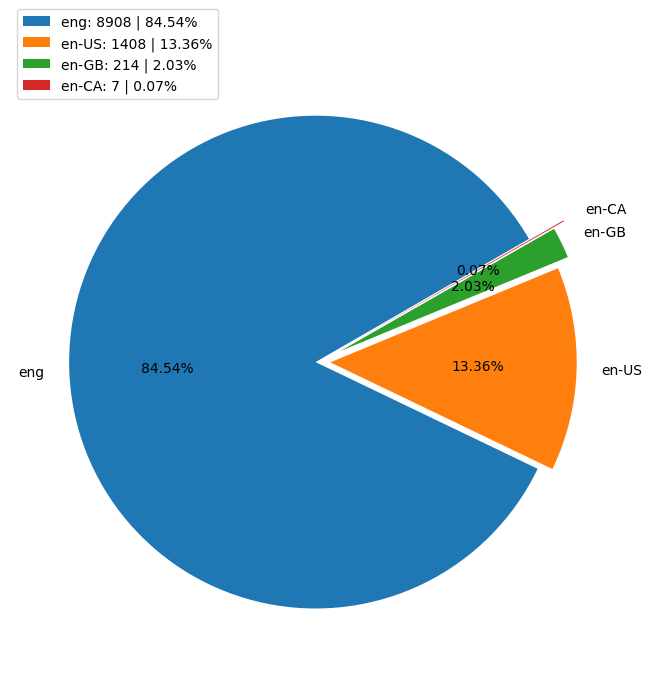

In [4]:
data_lang = df["language_code"].value_counts().rename_axis("language_code").reset_index(name="persentase")
data_show = data_lang.loc[data_lang['language_code'].isin(["eng", "en-US", "en-GB", "en-CA"])]

plt.figure(figsize=(8, 8))
plt.pie(
    data_show["persentase"],
    labels = ["eng", "en-US", "en-GB", "en-CA"],
    autopct="%.2f%%",
    startangle = 30,
    radius = (1),
    explode = (0.01, 0.05, 0.1, 0.15)
)

labels = [f'{l}: {s} | {s / data_show["persentase"].sum() * 100 :0.2f}%' for l, s in zip(data_show["language_code"], data_show["persentase"])]
plt.legend(bbox_to_anchor=(0, 1), loc=6, labels=labels)
plt.show()

### Grafik Bar<br>
#### Jumlah buku bahasa inggris dan variasi inggris lainnya
> eng = Inggris Umum
  <br> en-CA = Inggris Canada
  <br> en-US = Inggris United State
  <br> en-GB = Inggris Great Britain (UK)
  
> <b> Pada bar terlihat bahwa jumlah bahasa inggris UK cukup sedikit sampai tidak muncul (hanya 7) walaupun merupakan bahasa inggris yang tidak asing atau lumayan diketahui orang.

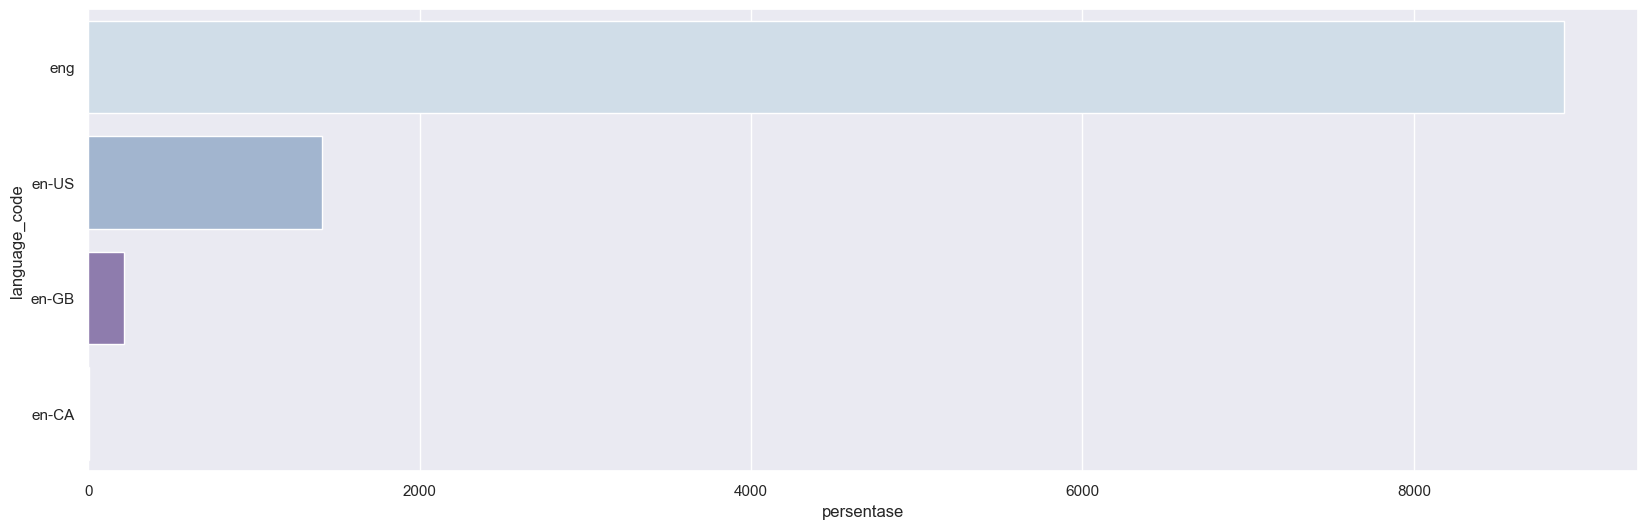

In [5]:
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(data = data_show, y="language_code", x="persentase", palette="BuPu")
plt.show()

### Heatmap<br>
> Buku dengan banyak halaman cendrung memiliki rating tinggi

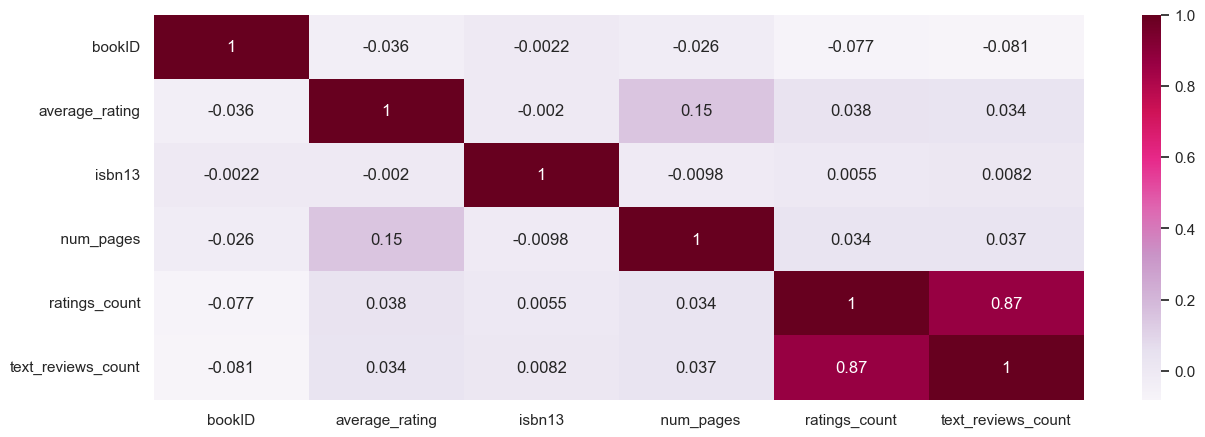

In [6]:
plt.figure(figsize=(15, 5))
sns.heatmap(
    df.corr(),
    annot = True,
    cmap = "PuRd"
)
plt.show()